<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Forecast_TotalVaksinasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
  import pandas as pd
  from keras.layers import Dense, LSTM
  import matplotlib.pyplot as plt
  import tensorflow as tf
  from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/Vaksin.csv')
df

,date,total_vaccinations
0,1/12/2021,13200.0
1,1/13/2021,26400.0
2,1/14/2021,38800.0
3,1/15/2021,51200.0
4,1/16/2021,63600.0
...,...,...
213,8/13/2021,79906437.0
214,8/14/2021,81184776.0
215,8/15/2021,81610890.0
216,8/16/2021,82907666.0


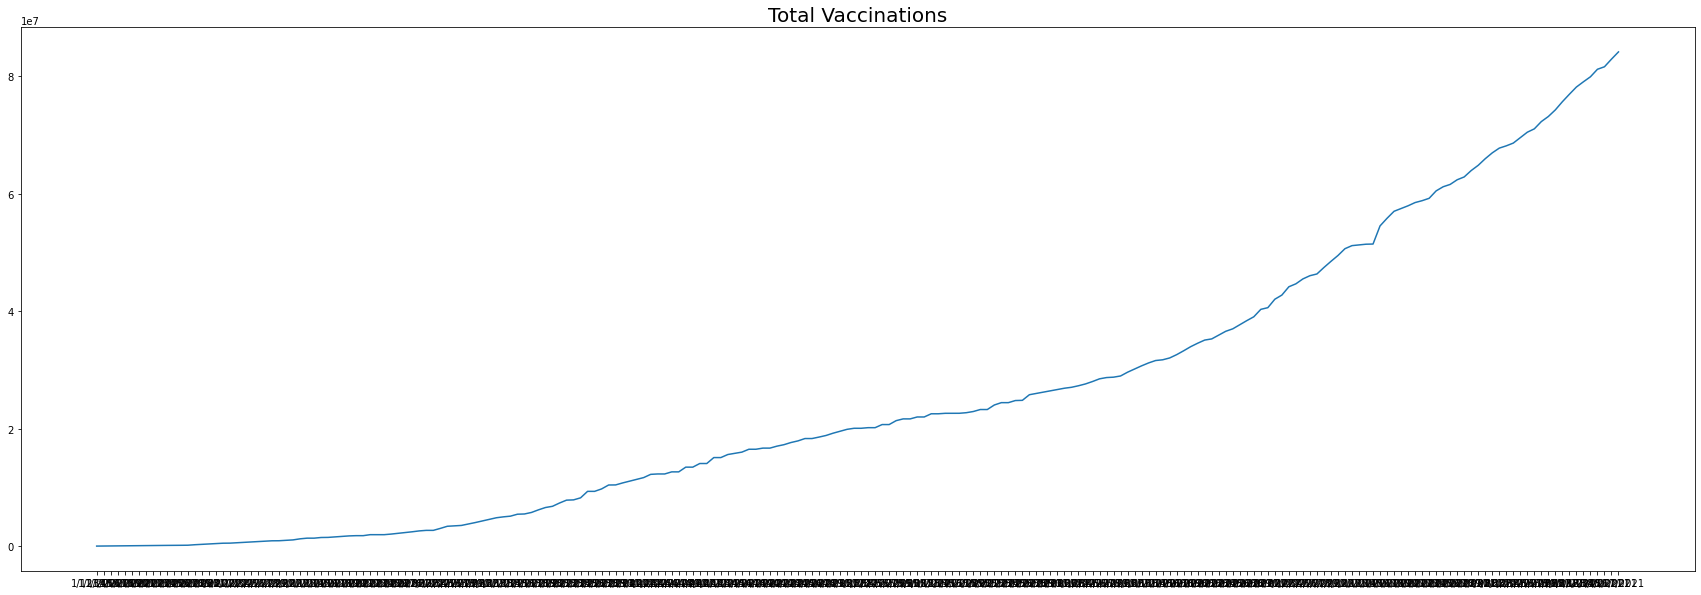

In [ ]:
dates = df['date'].values
case  = df['total_vaccinations'].values
  
  
plt.figure(figsize=(30,10))
plt.plot(dates, case)
plt.title('Total Vaccinations',
          fontsize=20);

In [ ]:
data_model = [df["date"],df["total_vaccinations"]]
df_model = pd.concat(data_model, axis=1)
df_model

,date,total_vaccinations
0,1/12/2021,13200.0
1,1/13/2021,26400.0
2,1/14/2021,38800.0
3,1/15/2021,51200.0
4,1/16/2021,63600.0
...,...,...
213,8/13/2021,79906437.0
214,8/14/2021,81184776.0
215,8/15/2021,81610890.0
216,8/16/2021,82907666.0


In [ ]:
df_model['date'] = pd.to_datetime(df_model['date'])
df_model.set_index('date', inplace= True)
df_model =df_model.resample('D').mean()


In [ ]:
df_model

,total_vaccinations
date,
2021-01-12,13200.0
2021-01-13,26400.0
2021-01-14,38800.0
2021-01-15,51200.0
2021-01-16,63600.0
...,...
2021-08-13,79906437.0
2021-08-14,81184776.0
2021-08-15,81610890.0


In [ ]:
df_model=df_model.values
df_model = df_model.astype('float32')
df_model

array([[1.3200000e+04],
       [2.6400000e+04],
       [3.8800000e+04],
       [5.1200000e+04],
       [6.3600000e+04],
       [7.6000000e+04],
       [8.8400000e+04],
       [1.0080000e+05],
       [1.1320000e+05],
       [1.2560000e+05],
       [1.3200000e+05],
       [1.3200000e+05],
       [1.4924200e+05],
       [1.6195900e+05],
       [2.4568500e+05],
       [3.0800300e+05],
       [3.7378600e+05],
       [4.1629900e+05],
       [5.0295500e+05],
       [5.1568100e+05],
       [5.7493800e+05],
       [6.4825900e+05],
       [7.1764700e+05],
       [7.9681900e+05],
       [8.6560900e+05],
       [9.1430300e+05],
       [9.2344900e+05],
       [9.8585500e+05],
       [1.0668600e+06],
       [1.2487970e+06],
       [1.3627910e+06],
       [1.3627910e+06],
       [1.4758120e+06],
       [1.4943250e+06],
       [1.5787200e+06],
       [1.6581100e+06],
       [1.7472670e+06],
       [1.7879760e+06],
       [1.7879760e+06],
       [1.9567250e+06],
       [1.9567250e+06],
       [1.956725

In [ ]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(df_model)
sc

array([[-9.9999994e-01],
       [-9.9968612e-01],
       [-9.9939138e-01],
       [-9.9909657e-01],
       [-9.9880177e-01],
       [-9.9850702e-01],
       [-9.9821222e-01],
       [-9.9791741e-01],
       [-9.9762261e-01],
       [-9.9732786e-01],
       [-9.9717569e-01],
       [-9.9717569e-01],
       [-9.9676579e-01],
       [-9.9646348e-01],
       [-9.9447304e-01],
       [-9.9299157e-01],
       [-9.9142766e-01],
       [-9.9041700e-01],
       [-9.8835689e-01],
       [-9.8805439e-01],
       [-9.8664564e-01],
       [-9.8490256e-01],
       [-9.8325300e-01],
       [-9.8137081e-01],
       [-9.7973549e-01],
       [-9.7857785e-01],
       [-9.7836041e-01],
       [-9.7687685e-01],
       [-9.7495109e-01],
       [-9.7062588e-01],
       [-9.6791589e-01],
       [-9.6791589e-01],
       [-9.6522903e-01],
       [-9.6478891e-01],
       [-9.6278256e-01],
       [-9.6089518e-01],
       [-9.5877564e-01],
       [-9.5780790e-01],
       [-9.5780790e-01],
       [-9.5379615e-01],


In [ ]:
timestep = 7

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])

X=np.asanyarray(X)
Y=np.asanyarray(Y)

k = 188
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]
print(Xtrain.shape)
print(Xtest.shape)

(188, 7, 1)
(23, 7, 1)


In [ ]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (23,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
6/6 [==============================] - 3s 15ms/step - loss: 0.2727
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1827
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1679
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.1682
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1584
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1411
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1173
Epoch 8/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0817
Epoch 9/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0295
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0051
Epoch 11/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0077
Epoch 12/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 13/50
6/6 [==============================] - 0s 14ms/st

Text(0.5, 1.0, 'Model Accuracy')

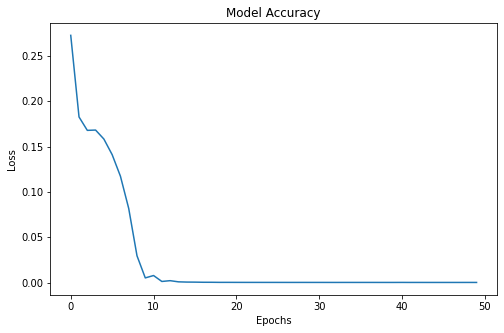

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [ ]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

20527612000000.0

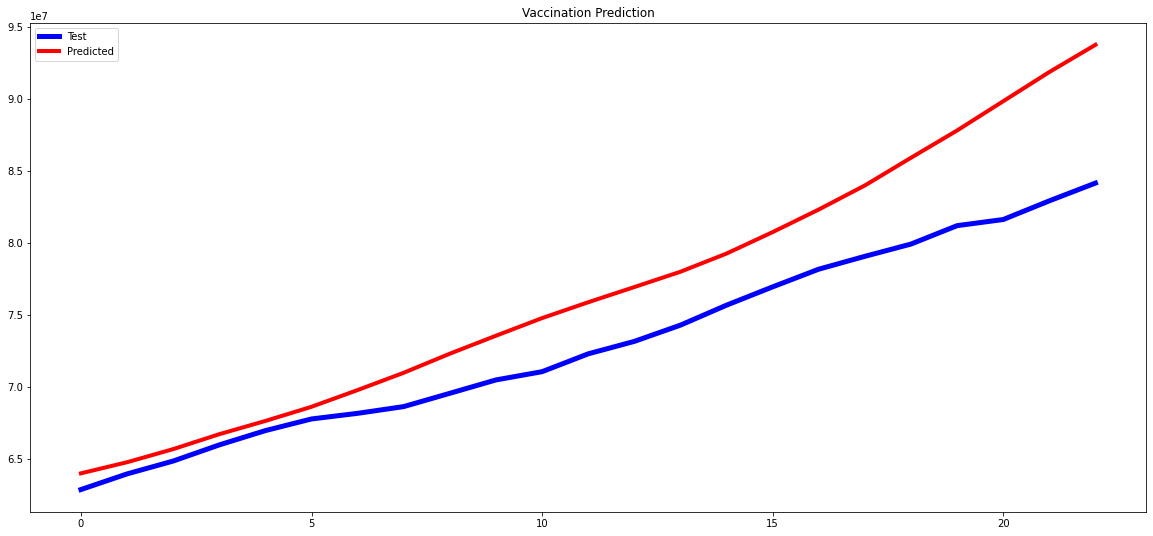

In [ ]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Vaccination Prediction")
plt.show()

In [ ]:
test = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])

In [ ]:
results = pd.concat([test,pred],axis=1)
results

,Actual,Predict
0,62858200.0,63984000.0
1,63944892.0,64756756.0
2,64838072.0,65665608.0
3,65959164.0,66703408.0
4,66952420.0,67622440.0
5,67761336.0,68606120.0
6,68151248.0,69768320.0
7,68620912.0,70968976.0
8,69543120.0,72294728.0
9,70471392.0,73541048.0
